In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df=pd.read_csv("customer_data.csv")

In [120]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
df.shape

(200, 5)

In [96]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual_Income_(k$),0
Spending_Score,0


In [97]:
df.drop_duplicates()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [98]:
df.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual_Income_(k$),int64
Spending_Score,int64


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [100]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [101]:
df=df.drop(columns=['CustomerID','Genre'])

In [102]:
from sklearn.preprocessing import StandardScaler


In [103]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)

In [104]:
from sklearn.cluster import KMeans

In [105]:
wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)


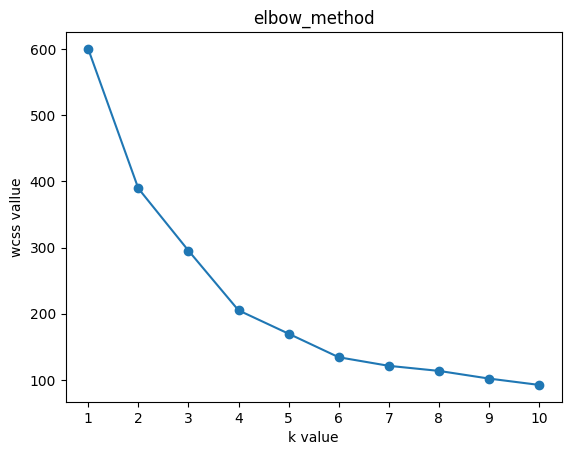

In [106]:
plt.plot(range(1,11),wcss,marker='o')
plt.title("elbow_method")
plt.xlabel("k value")
plt.ylabel("wcss vallue")
plt.xticks(range(1,11))
plt.show()

In [109]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)
print(df['Cluster'].value_counts())




Cluster
0    45
3    40
1    39
4    30
2    25
5    21
Name: count, dtype: int64


In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)


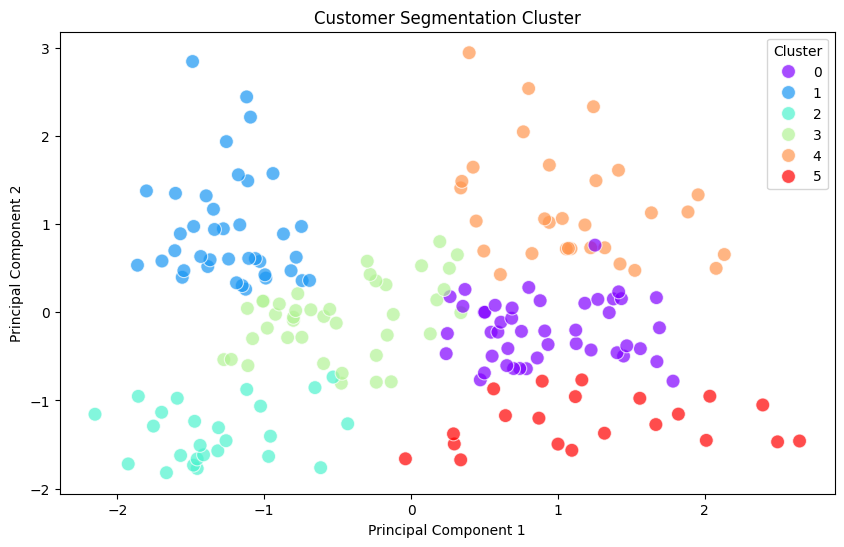

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df['Cluster'], palette='rainbow', s=100, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation Cluster")
plt.legend(title="Cluster")
plt.show()


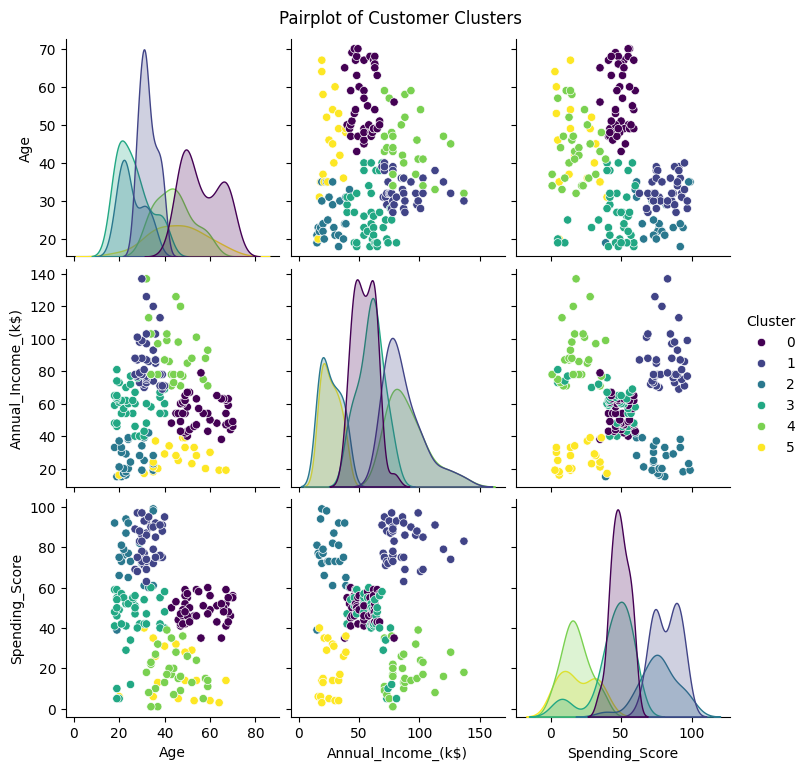

In [112]:
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle("Pairplot of Customer Clusters", y=1.02)
plt.show()

In [89]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

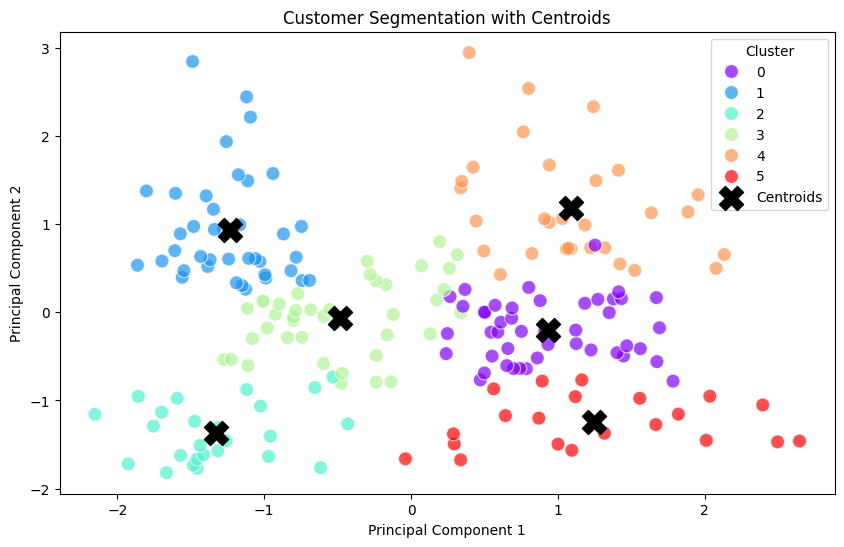

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=df['Cluster'], palette='rainbow', s=100, alpha=0.7)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation with Centroids")
plt.legend(title="Cluster")
plt.show()